In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  1 13:07:37 2019

@author: Jing
"""
"""
The Titanic dataset contains demographics and passenger information from 891 of the 2224 n\
passengers and crew on board the Titanic. The data was obtained from Kaggle website. n\
This project analyzes the relationship between the survival likelihood of Titanic passengers n\
and such factors as ticket class, age, number of siblings/spouses on board, number of parents n\
children on board, ticket number, fare, carbin number, and port of embarkation.
numbers of 
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

"""

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 

In [10]:
path = './titanic_data.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
titanic.isnull().mean() == 0

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool

This shows that three variables i.e. Age, Cabin, and Embarked have missing values

In [13]:
# Create a new column 'age_group' by categorizing ages into childen, adults, and elderly.

def age_group(data):
    """
    returns several age groups based on the age of the passenger
    """
    if data >= 65:
        return 'elderly'
    elif 16 <= data < 65:
        return 'adult'
    elif data < 16:
        return 'child'   
          
titanic['age_group']=titanic['Age'].apply(age_group)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [14]:
# Create series containing the columns for the sake of less typing later

survival = titanic['Survived']
passenger_class = titanic['Pclass']
sex = titanic['Sex']
age = titanic['Age']
age_group = titanic['age_group']
siblings_spouses = titanic['SibSp']
parents_children = titanic['Parch']
embark_port = titanic['Embarked']

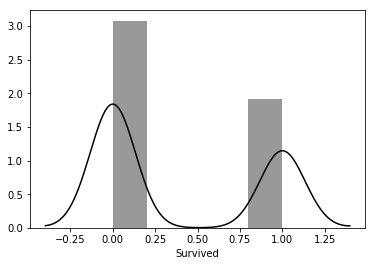

In [15]:
# Some general questions about the data #

# Were there more people who survived than those who didn't survive?

sns.distplot(titanic['Survived'], color='black')

In [16]:
Counter(titanic['Survived'])

Counter({0: 549, 1: 342})

In [17]:
print('342 out of 891 passengers survived. The survival rate is: '+'{0:.1%}'.format(342/891)+'.')

342 out of 891 passengers survived. The survival rate is: 38.4%.


In [18]:
print('{0:.1%}'.format(549/891)+' of the passengers (549 passengers) did not survive.')

61.6% of the passengers (549 passengers) did not survive.


In [19]:
# How is the age distribution of the passengers?

titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
titanic['Age'].median()

28.0

In [21]:
titanic['Age'].value_counts().idxmax()

24.0

In [29]:
Counter(titanic['Age']).most_common(20)

[(24.0, 30),
 (22.0, 27),
 (18.0, 26),
 (28.0, 25),
 (19.0, 25),
 (30.0, 25),
 (21.0, 24),
 (25.0, 23),
 (36.0, 22),
 (29.0, 20),
 (26.0, 18),
 (35.0, 18),
 (27.0, 18),
 (32.0, 18),
 (31.0, 17),
 (16.0, 17),
 (20.0, 15),
 (34.0, 15),
 (33.0, 15),
 (23.0, 15)]

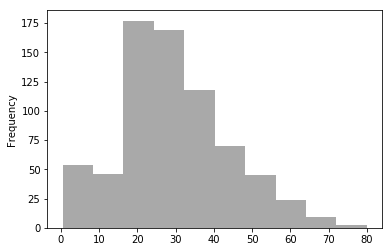

In [23]:
titanic['Age'].plot.hist(color='darkgrey')

In [24]:
# sns.displot(titanic['Age']) will raise a ValueError 'cannot convert float NaN to integer'

age_without_nan = titanic['Age'].dropna()

In [25]:
len(age_without_nan)

714

In [26]:
age_without_nan.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

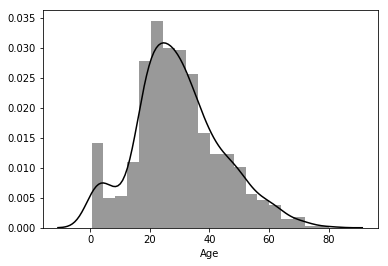

In [27]:
sns.distplot(age_without_nan, color='black')

In [28]:
Counter(titanic['age_group'])

Counter({'adult': 620, None: 177, 'child': 83, 'elderly': 11})

In [29]:
Counter(titanic['age_group'].dropna())

Counter({'adult': 620, 'child': 83, 'elderly': 11})

In [31]:
# How many people embarked from each of the three ports?

Counter(titanic['Embarked'])

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [32]:
# Sex distribution among passengers and different classes

Counter(titanic['Sex'])

Counter({'male': 577, 'female': 314})

In [33]:
titanic.groupby('Sex')['Pclass'].mean()

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

In [34]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

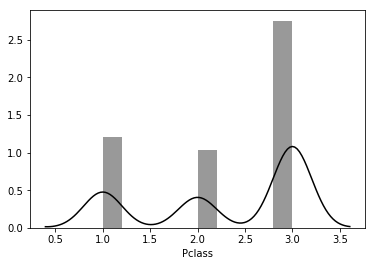

In [35]:
# Were there more people taking the 3rd class?

sns.distplot(titanic['Pclass'], kde=True, color='black')

In [36]:
Counter(titanic['Pclass'])

Counter({3: 491, 1: 216, 2: 184})

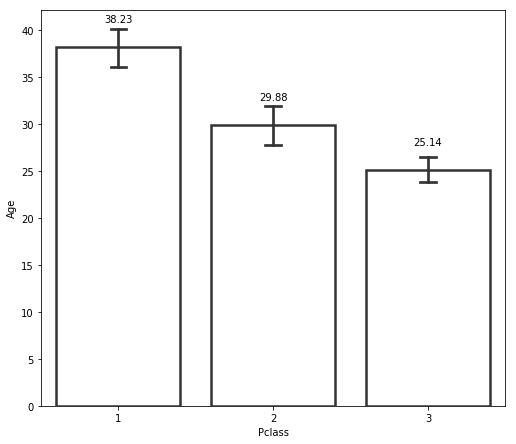

In [38]:
# How about the distribution of age and classes in relation to each other?

ax = sns.barplot(y=titanic['Age'], x=titanic['Pclass'], capsize=0.1, linewidth=2.5, \
                 facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
plt.subplots_adjust(top=1.5,right=1.2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., 
            height + 2.6,
            '{:1.2f}'.format(height),
            ha="center")

In [39]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [40]:
titanic.groupby(['Pclass', 'age_group'])['Survived'].mean()

Pclass  age_group
1       adult        0.666667
        child        0.833333
        elderly      0.166667
2       adult        0.421053
        child        1.000000
        elderly      0.000000
3       adult        0.204082
        child        0.431034
        elderly      0.000000
Name: Survived, dtype: float64

In [41]:
titanic.groupby(['Pclass', 'age_group', 'Sex'])['Survived'].mean()

Pclass  age_group  Sex   
1       adult      female    0.975610
                   male      0.391304
        child      female    0.666667
                   male      1.000000
        elderly    male      0.166667
2       adult      female    0.906250
                   male      0.068182
        child      female    1.000000
                   male      1.000000
        elderly    male      0.000000
3       adult      female    0.430556
                   male      0.130631
        child      female    0.533333
                   male      0.321429
        elderly    male      0.000000
Name: Survived, dtype: float64

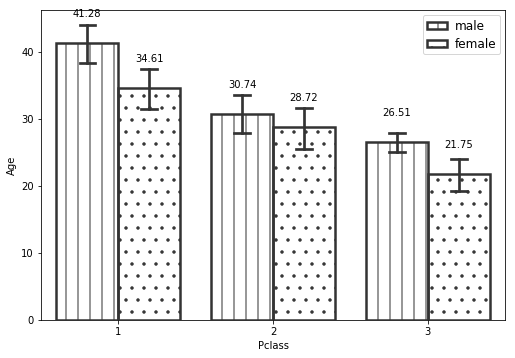

In [42]:
# Does the distribution of ages change among different classes?
    
ax = sns.barplot(y=titanic['Age'], x=titanic['Pclass'], hue=titanic['Sex'], capsize=0.1, \
                 linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
hatches = ['|', '|', '|', '.', '.', '.']
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='12')

plt.subplots_adjust(top=1.2,right=1.2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 4.0,
            '{:1.2f}'.format(height),
            ha="center")

In [43]:
# To get a rough idea of how the survival likelihood is related to the recorded factors

def barplot(factor):
    return sns.barplot(x=titanic[factor], y=titanic['Survived'], ci=95, capsize=.1, \
            linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor='.2', edgecolor='.2')

def lineplot(factor):
    return sns.lineplot(x=titanic[factor], y=titanic['Survived'], color='black')

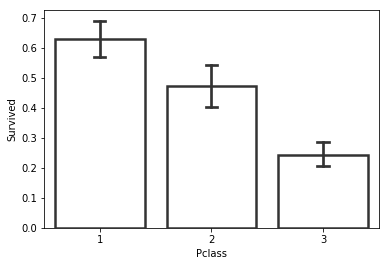

In [44]:
barplot('Pclass')

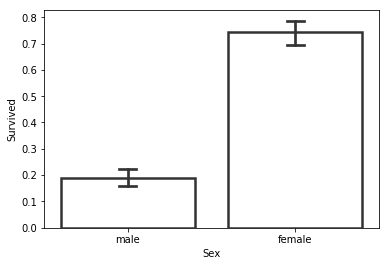

In [45]:
barplot('Sex')

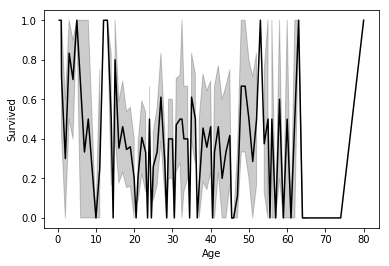

In [46]:
lineplot('Age')

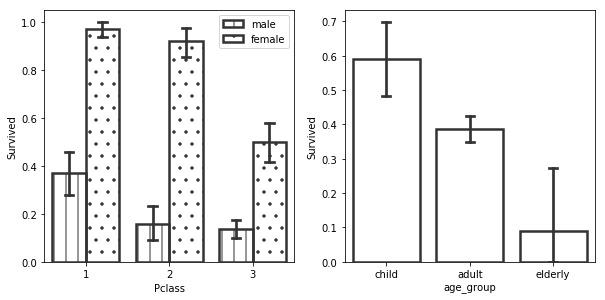

In [47]:
fig, axis = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.2, top=1.0,right=1.4)

ax1 = sns.barplot(x=titanic['Pclass'], y=titanic['Survived'], hue=titanic['Sex'], capsize=.1, \
                  ax=axis[0], linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
hatches = ['|', '|', '|', '.', '.', '.']
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend()

ax2 = sns.barplot(x=titanic['age_group'], y=titanic['Survived'], ax=axis[1], order=['child', 'adult', 'elderly'], \
                  capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')

In [48]:
titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [49]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

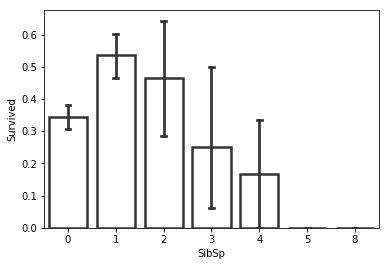

In [50]:
barplot('SibSp')

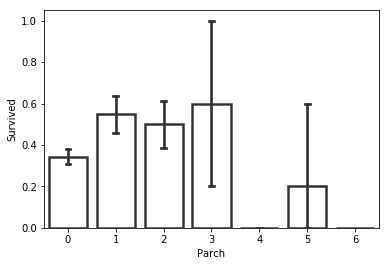

In [51]:
barplot('Parch')

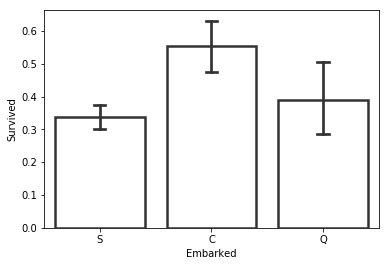

In [52]:
barplot('Embarked')

In [53]:
titanic.groupby('age_group')['Survived'].mean()

age_group
adult      0.387097
child      0.590361
elderly    0.090909
Name: Survived, dtype: float64

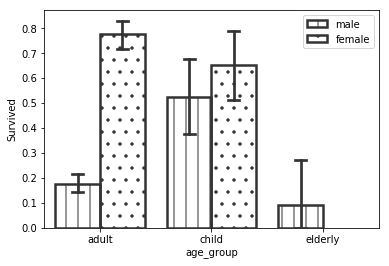

In [54]:
ax = sns.barplot(x=titanic['age_group'], y=titanic['Survived'], hue=titanic['Sex'], capsize=.1, \
                linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
hatches = ['|', '|', '|', '.', '.', '.']
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax.legend()

In [55]:
titanic.groupby(['age_group', 'Sex'])['Survived'].mean()

age_group  Sex   
adult      female    0.775229
           male      0.176617
child      female    0.651163
           male      0.525000
elderly    male      0.090909
Name: Survived, dtype: float64

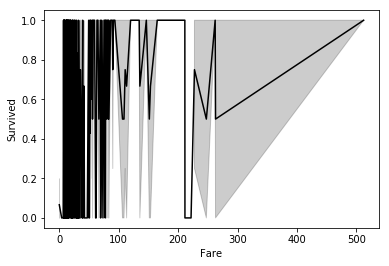

In [56]:
lineplot('Fare')

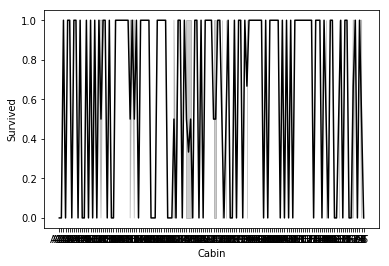

In [57]:
lineplot('Cabin')

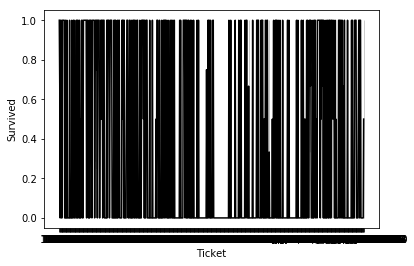

In [58]:
lineplot('Ticket')

In [59]:
# Based on the plots I decide that fare, cabin number, and ticket number didn't seem to have a relationship with survival, so I will only go on with analyzing other factors.

In [60]:
# Calculate Pearson's correlation r between these factors and the survival when applicabl

def correlation(variable1, variable2):
    
    standardized_variable1 = (variable1 - variable1.mean()) / variable1.std()
    standardized_variable2 = (variable2 - variable2.mean()) / variable2.std()
    
    r = (standardized_variable1 * standardized_variable2).mean()
    
    return r

In [61]:
correlation(passenger_class, survival)

-0.33810114703176347

In [62]:
correlation(age, survival)

-0.07788430661609241

In [63]:
correlation(age_without_nan, survival)

-0.07788430661609241

In [64]:
correlation(siblings_spouses, survival)

-0.03528285522817584

In [65]:
correlation(parents_children, survival)

0.08153779158731747

In [66]:
correlation(age, passenger_class)

-0.36966966806681567

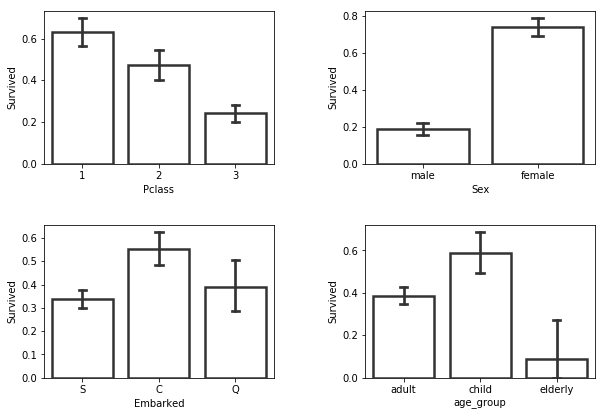

In [67]:
# At this point, I can already draw some tentative findings before applying machine learning for prediction

fig, axis=plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4,  top=1.4,right=1.4)
sns.barplot(y=titanic['Survived'], x=titanic['Pclass'], ax=axis[0,0], capsize=.1, \
            linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
sns.barplot(y=titanic['Survived'], x=titanic['Sex'], ax=axis[0,1], capsize=.1, \
            linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
sns.barplot(y=titanic['Survived'], x=titanic['Embarked'], ax=axis[1,0], capsize=.1, \
            linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')
sns.barplot(y=titanic['Survived'], x=titanic['age_group'], ax=axis[1,1], capsize=.1, \
            linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')

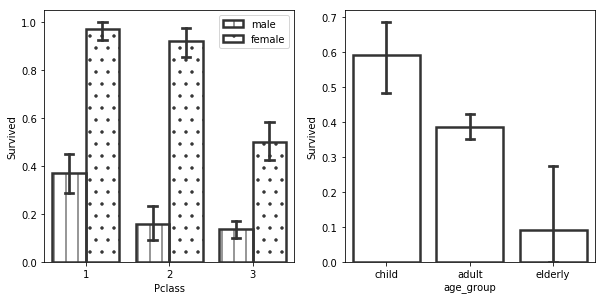

In [109]:
fig, axis = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.2, top=1.0,right=1.4)
ax1 = sns.barplot(x=titanic['Pclass'], y=titanic['Survived'], hue=titanic['Sex'], \
                  ax=axis[0], capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), \
                  errcolor=".2", edgecolor='.2')

hatches = ['|', '|', '|', '.', '.', '.']
# Loop over the bars
for i,thisbar in enumerate(ax1.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
ax1.legend()
ax2 = sns.barplot(x=titanic['age_group'], y=titanic['Survived'], ax=axis[1], \
                  order=['child', 'adult', 'elderly'], capsize=.1, linewidth=2.5, \
                   facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor='.2')

Among the 891 passengers analyzed, 342 of them survived (38.4%).

Mean age is 29.7 years old, minimum and maximum ages are 0.42 and 80, respectively. 

Most frequent age is 24 years old (30 passengers), while top 20 most frequent ages are within 16-36 years old, accounting for 46.4% of the passengaers.

There were more passengers in the 3rd class (491, 55%) than in the 1st class(214) and 2rd class(184).

Most people (about 72%) embarked on the ship from port S (Southampton). 

Passengers with the following features seem to have more likelihood to survive: being in the 1st class (r=-0.34), being female, having embarked at port C(Cherbourg), and being 16 or younger.

On the other hand, numbers of siblings and spouses (r=-0.04) as well as parents and children (r=0.08) did not seem to have a strong relationship with survival.
 